# About skills_detector.ipynb

This notebook detects skills in log files suchs as CVS.
This is a work in progress :)

In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils_timeline_viz
from utils_timeline_viz import *
from utils_read_parsing import *
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 10, 7
from matplotlib.backends.backend_pdf import PdfPages
pd.set_option('precision',3)
np.set_printoptions(precision=3,suppress=True)

In [2]:
table_cvs_df = pd.read_csv('table_cvs_results.txt', sep='\t')
graph_cvs_df = pd.read_csv('graph_cvs_results.txt', sep='\t')

In [3]:
metadf = get_student_metadata()
order = dict(zip(metadf.index,metadf['activity order']))
graph_cvs_df['activity order'] = graph_cvs_df.studentid.apply(lambda sid: order[sid])
table_cvs_df['activity order'] = table_cvs_df.studentid.apply(lambda sid: order[sid])

## Since we want a more stringent definition of CVS, we keep all instances of CVS where they had a sample or 3 or more points

In [4]:
graph_cvs_df = graph_cvs_df.replace(to_replace=2,value=0)
table_cvs_df = table_cvs_df.replace(to_replace=2,value=0)


In [5]:
table_cvs_df.head()

,studentid,Battery voltage,Area,Separation,Wavelength,Width,Concentration,activity order
0,11612162,0,0,0,3,0,3,CL
1,13660166,0,0,0,0,0,14,LC
2,41947147,0,0,0,14,6,7,CL
3,64006159,0,0,0,5,0,6,LC
4,15749160,0,0,3,0,4,10,CL


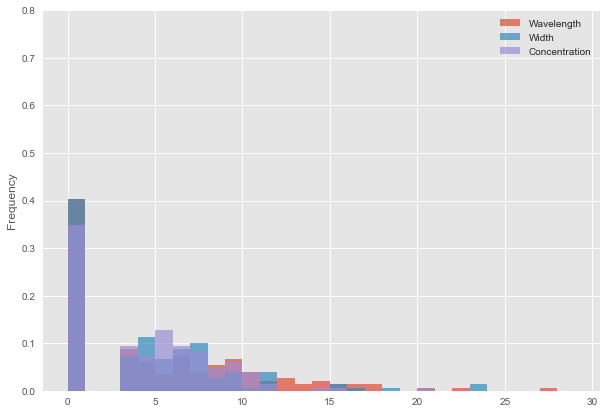

In [6]:
table_cvs_df[['Wavelength','Width','Concentration']].plot.hist(alpha=0.7,bins=range(30),normed =True,ylim=(0,0.8))

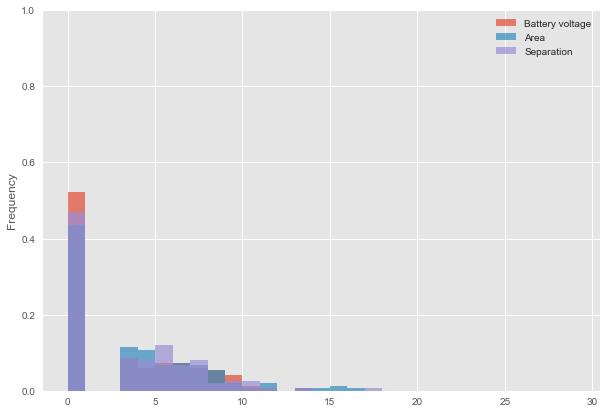

In [7]:
table_cvs_df[['Battery voltage','Area','Separation']].plot.hist(alpha=0.7,bins=range(30),normed =True,ylim=(0,1))

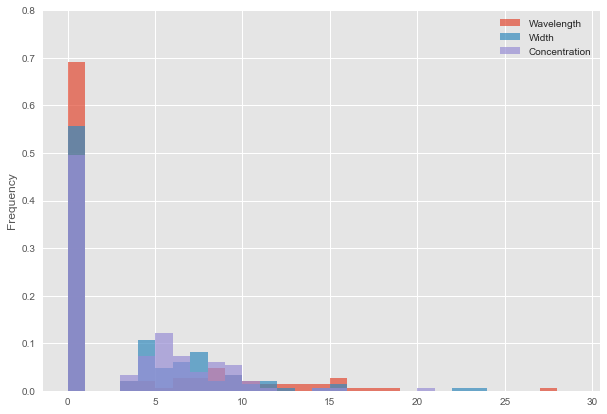

In [8]:
graph_cvs_df[['Wavelength','Width','Concentration']].plot.hist(alpha=0.7,bins=range(30),normed =True,ylim=(0,0.8))

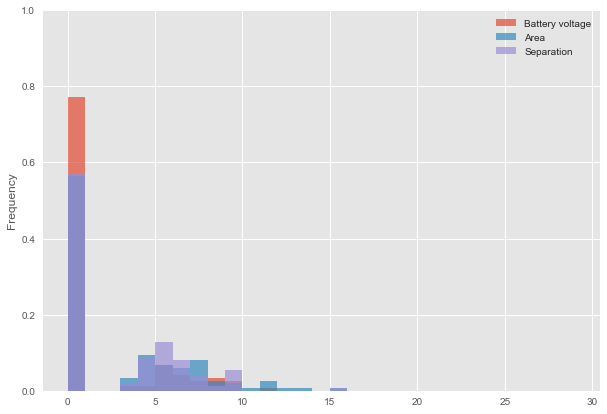

In [9]:
graph_cvs_df[['Battery voltage','Area','Separation']].plot.hist(alpha=0.7,bins=range(30),normed =True,ylim=(0,1))

In [10]:
def binarize(number):
    if number >0:
        return 1
    else:
        return 0

graph_cvs_df2 = graph_cvs_df.copy()
for c in graph_cvs_df:
    if c not in  ['studentid','activity order']:
        graph_cvs_df2[c] = graph_cvs_df.apply(lambda row: binarize(row[c]), axis=1)

table_cvs_df2 = table_cvs_df.copy()
for c in table_cvs_df:
     if c not in['studentid','activity order']:
        table_cvs_df2[c] = table_cvs_df.apply(lambda row: binarize(row[c]), axis=1)

In [11]:
graph_cvs_df2['sum'] = graph_cvs_df2[["Battery voltage","Area","Separation","Wavelength","Width","Concentration"]].sum(axis=1)
table_cvs_df2['sum'] = table_cvs_df2[["Battery voltage","Area","Separation","Wavelength","Width","Concentration"]].sum(axis=1)

# ANALYSIS

In [12]:
print "Of all {0} students, {1} didn't do CVS in the table and {2} in the graph.".format(len(table_cvs_df2), sum(table_cvs_df2['sum']==0),sum(graph_cvs_df2['sum']==0))
print "On average, out of a max of six variables, students did CVS on {0}+/-{1} variables in the table and {2}+/-{3} in the graph.".format(np.mean(table_cvs_df2['sum'].values),np.std(table_cvs_df2['sum'].values),np.mean(graph_cvs_df2['sum'].values),np.std(graph_cvs_df2['sum'].values))

Of all 149 students, 14 didn't do CVS in the table and 47 in the graph.
On average, out of a max of six variables, students did CVS on 3.41610738255+/-2.04020222429 variables in the table and 2.34899328859+/-2.06578445862 in the graph.


In [13]:
table_cvs_df2.head()

,studentid,Battery voltage,Area,Separation,Wavelength,Width,Concentration,activity order,sum
0,11612162,0,0,0,1,0,1,CL,2
1,13660166,0,0,0,0,0,1,LC,1
2,41947147,0,0,0,1,1,1,CL,3
3,64006159,0,0,0,1,0,1,LC,2
4,15749160,0,0,1,0,1,1,CL,3


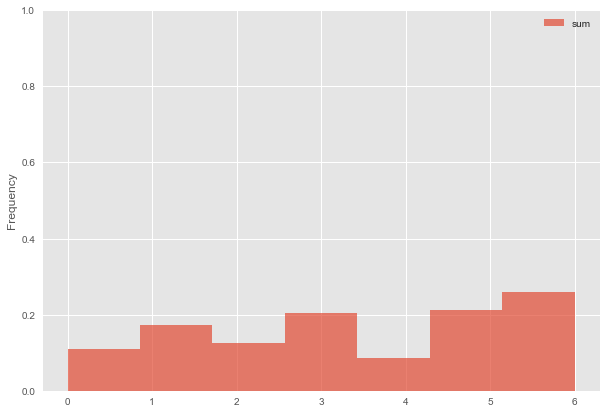

In [14]:
table_cvs_df2[['sum']].plot.hist(alpha=0.7,bins=7,normed =True,ylim=(0,1))

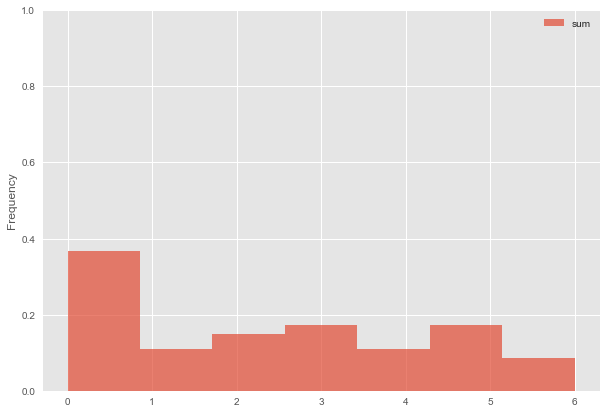

In [15]:
graph_cvs_df2[['sum']].plot.hist(alpha=0.7,bins=7,normed =True,ylim=(0,1))

In [16]:
graph_cvs_df2.mean()

studentid          2.200e+07
Battery voltage    2.282e-01
Area               4.362e-01
Separation         4.295e-01
Wavelength         3.087e-01
Width              4.430e-01
Concentration      5.034e-01
sum                2.349e+00
dtype: float64

In [17]:
print "Percentage of students doing CVS in the table for each variable:"
for c in table_cvs_df2:
     if c not in['studentid','activity order','sum']:
        print '\t',c,":\t", round(np.mean(table_cvs_df2[c].values),2)
print "Percentage of students doing CVS in the graph for each variable:"
for c in graph_cvs_df2:
     if c not in['studentid','activity order','sum']:
        print '\t',c,":\t", round(np.mean(graph_cvs_df2[c].values),2)

Percentage of students doing CVS in the table for each variable:
	Battery voltage :	0.48
	Area :	0.56
	Separation :	0.53
	Wavelength :	0.6
	Width :	0.6
	Concentration :	0.65
Percentage of students doing CVS in the graph for each variable:
	Battery voltage :	0.23
	Area :	0.44
	Separation :	0.43
	Wavelength :	0.31
	Width :	0.44
	Concentration :	0.5


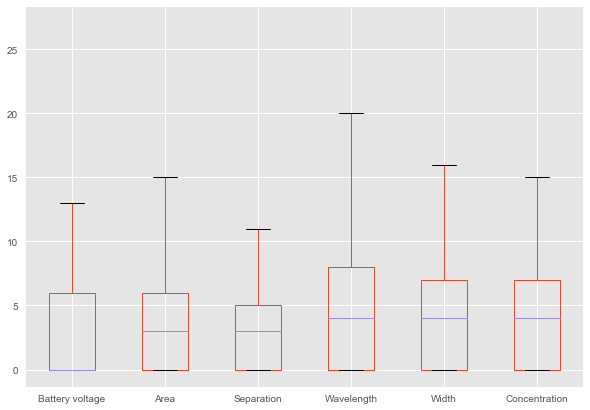

In [18]:
table_cvs_df[["Battery voltage","Area","Separation","Wavelength","Width","Concentration"]].plot.box()

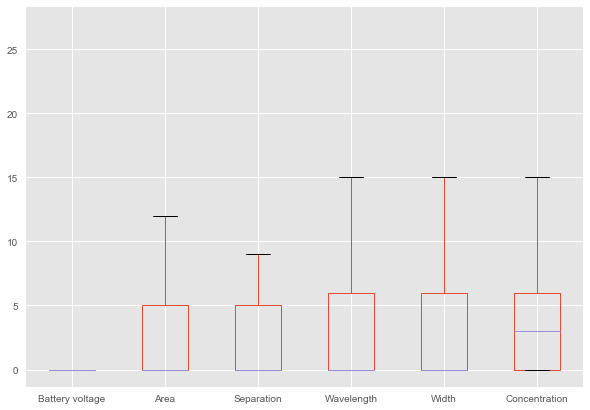

In [19]:
graph_cvs_df[["Battery voltage","Area","Separation","Wavelength","Width","Concentration"]].plot.box()

## Difference between CL and LC

In [20]:
table_cvs_df.groupby(by='activity order').mean()

,studentid,Battery voltage,Area,Separation,Wavelength,Width,Concentration
activity order,,,,,,,
CL,2.009e+07,2.722,2.819,2.653,5.236,4.514,4.278
LC,2.378e+07,2.922,3.961,3.519,4.662,3.649,4.013


In [21]:
graph_cvs_df.groupby(by='activity order').mean()

,studentid,Battery voltage,Area,Separation,Wavelength,Width,Concentration
activity order,,,,,,,
CL,2.009e+07,1.306,2.208,2.097,3.306,3.764,3.667
LC,2.378e+07,1.571,3.286,2.883,2.714,2.571,2.948


In [22]:
table_cvs_df_CL = table_cvs_df[table_cvs_df['activity order']=='CL']
table_cvs_df_LC = table_cvs_df[table_cvs_df['activity order']=='LC']
table_cvs_df2_CL = table_cvs_df2[table_cvs_df2['activity order']=='CL']
table_cvs_df2_LC = table_cvs_df2[table_cvs_df2['activity order']=='LC']
graph_cvs_df_CL = graph_cvs_df[graph_cvs_df['activity order']=='CL']
graph_cvs_df_LC = graph_cvs_df[graph_cvs_df['activity order']=='LC']
graph_cvs_df2_CL = graph_cvs_df2[graph_cvs_df2['activity order']=='CL']
graph_cvs_df2_LC = graph_cvs_df2[graph_cvs_df2['activity order']=='LC']

In [23]:
print "In table"
print "\tPercentage of students doing CVS in the table for each variable for LC:"
for c in table_cvs_df2_LC:
     if c not in['studentid','activity order','sum']:
        print '\t\t',c,":\t", round(np.mean(table_cvs_df2_LC[c].values),2)
print "\tPercentage of students doing CVS in the table for each variable for CL:"
for c in table_cvs_df2_CL:
     if c not in['studentid','activity order','sum']:
        print '\t\t',c,":\t", round(np.mean(table_cvs_df2_CL[c].values),2)

print "In graph"
print "\tPercentage of students doing CVS in the graph for each variable for LC:"
for c in graph_cvs_df2_LC:
     if c not in['studentid','activity order','sum']:
        print '\t\t',c,":\t", round(np.mean(graph_cvs_df2_LC[c].values),2)
print "\tPercentage of students doing CVS in the graph for each variable for CL:"
for c in graph_cvs_df2_CL:
     if c not in['studentid','activity order','sum']:
        print '\t\t',c,":\t", round(np.mean(graph_cvs_df2_CL[c].values),2)

In table
	Percentage of students doing CVS in the table for each variable for LC:
		Battery voltage :	0.48
		Area :	0.66
		Separation :	0.58
		Wavelength :	0.6
		Width :	0.61
		Concentration :	0.66
	Percentage of students doing CVS in the table for each variable for CL:
		Battery voltage :	0.47
		Area :	0.46
		Separation :	0.47
		Wavelength :	0.6
		Width :	0.58
		Concentration :	0.64
In graph
	Percentage of students doing CVS in the graph for each variable for LC:
		Battery voltage :	0.23
		Area :	0.53
		Separation :	0.49
		Wavelength :	0.27
		Width :	0.39
		Concentration :	0.48
	Percentage of students doing CVS in the graph for each variable for CL:
		Battery voltage :	0.22
		Area :	0.33
		Separation :	0.36
		Wavelength :	0.35
		Width :	0.5
		Concentration :	0.53


## table + graph combo

In [24]:
for var in ["Battery voltage","Area","Separation","Wavelength","Width","Concentration"]:
    print '\n',var, " CL, LC"
    noneCL = len(set(table_cvs_df2_CL[table_cvs_df2_CL[var]==0].index.values).intersection(set(graph_cvs_df2_CL[graph_cvs_df2_CL[var]==0].index.values)))/float(len(table_cvs_df2_CL))
    noneLC = len(set(table_cvs_df2_LC[table_cvs_df2_LC[var]==0].index.values).intersection(set(graph_cvs_df2_LC[graph_cvs_df2_LC[var]==0].index.values)))/float(len(table_cvs_df2_LC))
    print '\t none\t:',round(noneCL,2),round(noneLC,2)
    tableCL = len(set(table_cvs_df2_CL[table_cvs_df2_CL[var]==1].index.values).intersection(set(graph_cvs_df2_CL[graph_cvs_df2_CL[var]==0].index.values)))/float(len(table_cvs_df2_CL))
    tableLC = len(set(table_cvs_df2_LC[table_cvs_df2_LC[var]==1].index.values).intersection(set(graph_cvs_df2_LC[graph_cvs_df2_LC[var]==0].index.values)))/float(len(table_cvs_df2_LC))
    print '\t table\t:',round(tableCL,2),round(tableLC,2)
    graphCL = len(set(table_cvs_df2_CL[table_cvs_df2_CL[var]==0].index.values).intersection(set(graph_cvs_df2_CL[graph_cvs_df2_CL[var]==1].index.values)))/float(len(table_cvs_df2_CL))
    graphLC = len(set(table_cvs_df2_LC[table_cvs_df2_LC[var]==0].index.values).intersection(set(graph_cvs_df2_LC[graph_cvs_df2_LC[var]==1].index.values)))/float(len(table_cvs_df2_LC))
    print '\t graph\t:',round(graphCL,2),round(graphLC,2)
    bothCL = len(set(table_cvs_df2_CL[table_cvs_df2_CL[var]==1].index.values).intersection(set(graph_cvs_df2_CL[graph_cvs_df2_CL[var]==1].index.values)))/float(len(table_cvs_df2_CL))
    bothLC = len(set(table_cvs_df2_LC[table_cvs_df2_LC[var]==1].index.values).intersection(set(graph_cvs_df2_LC[graph_cvs_df2_LC[var]==1].index.values)))/float(len(table_cvs_df2_LC))
    print '\t both\t:',round(bothCL,2),round(bothLC,2)


Battery voltage  CL, LC
	 none	: 0.53 0.52
	 table	: 0.25 0.25
	 graph	: 0.0 0.0
	 both	: 0.22 0.23

Area  CL, LC
	 none	: 0.54 0.34
	 table	: 0.13 0.13
	 graph	: 0.0 0.0
	 both	: 0.33 0.53

Separation  CL, LC
	 none	: 0.53 0.42
	 table	: 0.11 0.09
	 graph	: 0.0 0.0
	 both	: 0.36 0.49

Wavelength  CL, LC
	 none	: 0.4 0.4
	 table	: 0.25 0.32
	 graph	: 0.0 0.0
	 both	: 0.35 0.27

Width  CL, LC
	 none	: 0.42 0.39
	 table	: 0.08 0.22
	 graph	: 0.0 0.0
	 both	: 0.5 0.39

Concentration  CL, LC
	 none	: 0.36 0.34
	 table	: 0.11 0.18
	 graph	: 0.0 0.0
	 both	: 0.53 0.48
